# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
# Put your EDA code here
col_rep_id = 'Rep ID'
col_busy_minutes = 'Busy Minutes'
col_not_ready_mins = 'Not Ready Minutes'
col_incoming_wait_time = 'Incoming Wait Time'
col_during_call_wait_time = 'During Call Wait Time'
col_time_block = 'Time Block'
col_calls = 'Calls'

def explore_and_print_branch_data(df, label):
    reps_count = len(pd.unique(df[col_rep_id]))
    avg_busy_mins = df[col_busy_minutes].mean()
    avg_not_ready_mins = df[col_not_ready_mins].mean()
    avg_incoming_wait_time = df[col_incoming_wait_time].mean()
    avg_during_call_wait_time = df[col_during_call_wait_time].mean()
    num_calls_by_block = df.groupby(col_time_block)[col_calls].sum()
    
    print(f'{label} branch reps count ', reps_count)
    print(f'{label} branch avg busy mins ', avg_busy_mins)
    print(f'{label} branch avg not ready mins ', avg_not_ready_mins)
    print(f'{label} branch avg incoming wait time ', avg_incoming_wait_time)
    print(f'{label} branch avg during call wait time ', avg_during_call_wait_time)
    print(f'{label} branch num calls taken by time block\n', num_calls_by_block)

# North branch
explore_and_print_branch_data(north_df, 'north')

# South branch
print('') # for spacing
explore_and_print_branch_data(south_df, 'south')

north branch reps count  9
north branch avg busy mins  9.987755102040817
north branch avg not ready mins  1.9142857142857144
north branch avg incoming wait time  3.048780487804878
north branch avg during call wait time  2.9673469387755103
north branch num calls taken by time block
 Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64

south branch reps count  11
south branch avg busy mins  10.054140127388536
south branch avg not ready mins  1.910828025477707
south branch avg incoming wait time  3.0
south branch avg during call wait time  3.0764331210191083
south branch num calls taken by time block
 Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64


### EDA Results

Make note of your results here!

1. How many reps are in each branch? 
north branch reps count  9
south branch reps count  11

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
north branch avg busy mins  9.987755102040817
north branch avg not ready mins  1.9142857142857144
north branch avg incoming wait time  3.048780487804878
north branch avg during call wait time  2.9673469387755103

south branch avg busy mins  10.054140127388536
south branch avg not ready mins  1.910828025477707
south branch avg incoming wait time  3.0
south branch avg during call wait time  3.0764331210191083

3. What is the number of calls taken for each time block?
 Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5

 Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [3]:
# Clean your data here
col_call_type = 'Incoming or Outgoing'
    
north_grouped_by_call_type = north_df.groupby(col_call_type).count()
print('North grouped by call type')
print(north_grouped_by_call_type)

south_grouped_by_call_type = south_df.groupby(col_call_type).count()
print('\nSouth grouped by call type')
print(south_grouped_by_call_type)

print('')
north_no_duplicates = north_df.drop_duplicates()
print('north duplicates count ', north_df.size - north_no_duplicates.size)

south_no_duplicates = south_df.drop_duplicates()
print('south duplicates count ', south_df.size - south_no_duplicates.size)

North grouped by call type
                      Unnamed: 0  Branch  Call Purpose  Time Block  Queue  \
Incoming or Outgoing                                                        
Incoming                      82      82            82          82     82   
Outgoing                     163     163           163         163    163   

                      Rep ID  Sale  Lost Call  Abandoned  Busy Minutes  \
Incoming or Outgoing                                                     
Incoming                  82    82         82         82            82   
Outgoing                 163   163        163        163           163   

                      Not Ready Minutes  Incoming Wait Time  \
Incoming or Outgoing                                          
Incoming                             82                  82   
Outgoing                            163                   0   

                      During Call Wait Time  Calls  
Incoming or Outgoing                                
Incoming

In [50]:
col_call_type = 'Incoming or Outgoing'
    
north_grouped_by_call_type = north_df.groupby(col_call_type).count()
north_grouped_by_call_type

,Unnamed: 0,Branch,Call Purpose,Time Block,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Incoming or Outgoing,,,,,,,,,,,,,,
Incoming,82,82,82,82,82,82,82,82,82,82,82,82,82,82
Outgoing,163,163,163,163,163,163,163,163,163,163,163,0,163,163


In [51]:
south_grouped_by_call_type = south_df.groupby(col_call_type).count()
south_grouped_by_call_type

,Unnamed: 0,Branch,Call Purpose,Time Block,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Incoming or Outgoing,,,,,,,,,,,,,,
Incoming,126,126,126,126,126,126,126,126,126,126,126,126,126,126
Outgoing,188,188,188,188,188,188,188,188,188,188,188,0,188,188


In [52]:
north_no_duplicates = north_df.drop_duplicates()
print('north duplicates count ', north_df.size - north_no_duplicates.size)

north duplicates count  0


In [53]:
south_no_duplicates = south_df.drop_duplicates()
print('south duplicates count ', south_df.size - south_no_duplicates.size)

south duplicates count  0


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
Yes, for the North branch dataset, the incoming wait time is 0 where the call type is Outgoing. Same for the South branch dataset. I got this result by grouping the dataset by call type and called count on the grouped dataframe and printed it. In the print out, I saw that the incoming wait time was 0 where the call type is 'Outgoing'.

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue? 
I do show only one "YES" value for the North dataset
3. Are there duplicates in the two data sets? If there are, how did you handle them?
No, there are no duplicates in the North and South datasets. I arrived at this by dropping the duplicates in the datasets, and subtracting the size of the full and deduplicated dataframes and for both North and South, the difference was 0.

4. Is any of the data in the two data sets unnecessary? 
If yes, how did you handle it? I did not find any data unnecessary, hence i did not have to drop any column.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [4]:
# Manipulate data here
merged_df = pd.concat([north_df, south_df])

In [5]:
north_reps_sorted_by_calls = north_df.groupby(col_rep_id).sum().sort_values(by=col_calls, ascending=False)
north_reps_sorted_by_calls

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Lilly,3375,0,2,307,59,37.0,88,30
Duke,2999,2,0,292,56,39.0,85,29
Todd,4252,1,0,296,58,21.0,97,29
Joe,3178,0,0,256,49,36.0,81,26
Cam,2746,1,0,233,46,32.0,66,24
Xander,3340,1,0,244,44,20.0,68,24
Amanda,2666,0,1,229,43,12.0,60,23
Andy,2494,0,3,228,43,36.0,65,23


In [6]:
south_reps_sorted_by_calls = south_df.groupby(col_rep_id).sum().sort_values(by=col_calls, ascending=False)
south_reps_sorted_by_calls

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
George,4620,0,0,298,53,41.0,87,29
Kate,4615,0,0,291,61,37.0,83,29
Karl,4532,1,0,287,61,26.0,85,28
Josh,3960,3,0,260,50,31.0,83,26
Susan,4006,2,0,267,53,35.0,88,26


In [44]:
north_df_abandoned_calls_df = north_df['Abandoned'].aggregate(['count', 'sum'])
north_df_calls_count = north_df_abandoned_calls_df.loc['count']
north_df_abandoned_calls_count = north_df_abandoned_calls_df.loc['sum']
north_df_abandoned_percentage = (north_df_abandoned_calls_count / north_df_calls_count) * 100
print('north abandoned calls percentage ', north_df_abandoned_percentage, '%')

north abandoned calls percentage  2.857142857142857 %


In [45]:
south_df_abandoned_calls_df = south_df['Abandoned'].aggregate(['count', 'sum'])
south_df_calls_count = south_df_abandoned_calls_df.loc['count']
south_df_abandoned_calls_count = south_df_abandoned_calls_df.loc['sum']
south_df_abandoned_percentage = (south_df_abandoned_calls_count / south_df_calls_count) * 100
print('south abandoned calls percentage ', south_df_abandoned_percentage, '%')

south abandoned calls percentage  1.2738853503184715 %


In [46]:
merged_df_abandoned_calls_df = merged_df['Abandoned'].aggregate(['count', 'sum'])
merged_df_calls_count = merged_df_abandoned_calls_df.loc['count']
merged_df_abandoned_calls_count = merged_df_abandoned_calls_df.loc['sum']
merged_df_abandoned_percentage = (merged_df_abandoned_calls_count / merged_df_calls_count) * 100
print('merged abandoned calls percentage ', merged_df_abandoned_percentage, '%')

merged abandoned calls percentage  1.9677996422182469 %


In [47]:
speed_of_answer_group_by_dict = {
  'Busy Minutes': 'Speed of Answer',
  'Not Ready Minutes': 'Speed of Answer',
  'Incoming Wait Time': 'Speed of Answer',
}
north_df_speed_of_answer_df = north_df.groupby(speed_of_answer_group_by_dict, axis = 1).sum()
south_df_speed_of_answer_df = south_df.groupby(speed_of_answer_group_by_dict, axis = 1).sum()
merged_df_speed_of_answer_df = merged_df.groupby(speed_of_answer_group_by_dict, axis = 1).sum()
north_df_service_level = north_df_speed_of_answer_df[north_df_speed_of_answer_df['Speed of Answer'] < 2].size / north_df_calls_count * 100
south_df_service_level = south_df_speed_of_answer_df[south_df_speed_of_answer_df['Speed of Answer'] < 2].size / south_df_calls_count * 100
merged_df_service_level = merged_df_speed_of_answer_df[merged_df_speed_of_answer_df['Speed of Answer'] < 2].size / merged_df_calls_count * 100
print('north service level percentage ', north_df_service_level, '%')
print('south service level percentage ', south_df_service_level, '%')
print('merged service level percentage ', merged_df_service_level, '%')

north service level percentage  0.0 %
south service level percentage  0.0 %
merged service level percentage  0.0 %


In [48]:
north_df_avg_speed_of_answer = north_df_speed_of_answer_df['Speed of Answer'].mean()
south_df_avg_speed_of_answer = south_df_speed_of_answer_df['Speed of Answer'].mean()
merged_df_avg_speed_of_answer = merged_df_speed_of_answer_df['Speed of Answer'].mean()
print('north avg speed of answer ', north_df_avg_speed_of_answer, 'minutes')
print('south avg speed of answer ', south_df_avg_speed_of_answer, 'minutes')
print('merged avg speed of answer ', merged_df_avg_speed_of_answer, 'minutes')

north avg speed of answer  12.922448979591836 minutes
south avg speed of answer  13.168789808917197 minutes
merged avg speed of answer  13.0608228980322 minutes


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
Brent has the highest number of calls in the North branch.
Eric has the highest number of calls in the South branch.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
north abandoned calls percentage  2.857142857142857 %
south abandoned calls percentage  1.2738853503184715 %
merged abandoned calls percentage  1.9677996422182469 %
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
north service level percentage  0.0 %
south service level percentage  0.0 %
merged service level percentage  0.0 %
4. For each branch and the entire company, what is the average speed of answer?
north avg speed of answer  12.922448979591836 minutes
south avg speed of answer  13.168789808917197 minutes
merged avg speed of answer  13.0608228980322 minutes

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

([<matplotlib.patches.Wedge at 0x1c47fe6c610>,
 [Text(0.05535742363123089, 1.0986061876982638, 'A'),
  Text(-0.8862167345839298, -0.6516286514138224, 'B'),
  Text(0.06855782847710074, -1.0978614776712519, 'C'),
  Text(0.8939848864344047, -0.6409298111547509, 'D')],
 [Text(0.030194958344307753, 0.5992397387445074, '48 %'),
  Text(-0.48339094613668887, -0.3554338098620849, '23 %'),
  Text(0.03739517916932767, -0.5988335332752283, '8 %'),
  Text(0.48762811987331156, -0.3495980788116823, '20 %')])

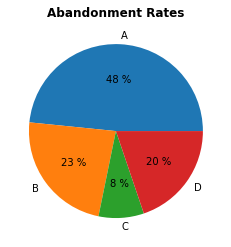

In [49]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = merged_df.groupby("Queue").agg("sum")
for i in range(4):
     abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) * 100
    
plt.title('Abandonment Rates', weight='bold')
plt.pie(abandonment_rates.values(), labels=abandonment_rates.keys(), autopct='%.0f %%')

In [42]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
def calculate_service_level(df, branch):
    north_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

    # Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

    # Table 1: Total Incoming calls less than 2 seconds grouped by Rep
    quick_calls = df[df["Incoming Wait Time"] <= 2.0]
    quick_reps = quick_calls[["Rep ID", "Calls"]]
    quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


    # Table 2: Total Incoming Calls Only grouped by Rep
    total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
    rep_calls = total_calls_in[["Rep ID", "Calls"]]     
    total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
    
    #  Table 3: Service Level Percentage created via merge
    service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

    # Create Percentage Column in Table 3
    service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
    print("Avg service level for ", branch,' ', service_level["Service Level %"].mean())
    service_level.plot.bar(edgecolor = 'white', title='Average speed of answer per rep for ' + branch)



# north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# # Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# # Table 1: Total Incoming calls less than 2 seconds grouped by Rep
# quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
# quick_reps = quick_calls[["Rep ID", "Calls"]]
# quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# # Table 2: Total Incoming Calls Only grouped by Rep
# total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
# rep_calls = total_calls_in[["Rep ID", "Calls"]]     
# total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
# service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# # Create Percentage Column in Table 3
# service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# north_df.plot.bar(edgecolor = 'white')
# plt.title('Average speed of answer per rep',color = 'black')
# # plt.xticks(color = 'black')
# # plt.yticks(color = 'black')
# plt.xlabel('Rep ID',color = 'black')
# plt.ylabel('Calls',color = 'black')
# plt.legend(title = 'Service Level', fontsize = 12)
# plt.savefig('bar_vertical.png')

# service_level.plot.bar(edgecolor = 'white', title='Average speed of answer per rep')

Avg service level for  North   41.47907647907647
Avg service level for  South   36.198965176237905
Avg service level for  Merged   38.575015262515265


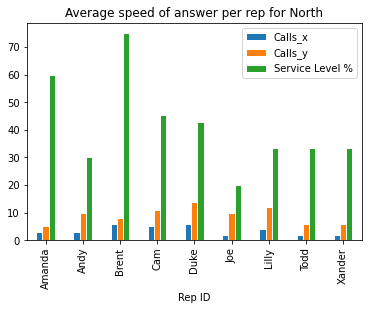

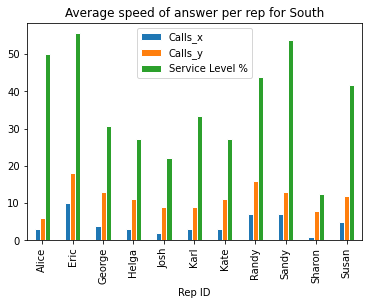

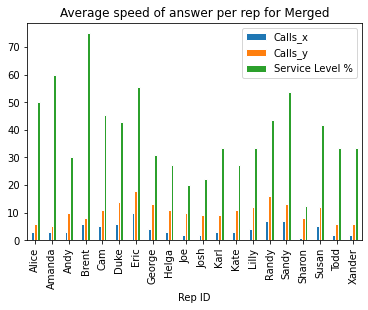

In [43]:
calculate_service_level(north_df, 'North')
calculate_service_level(south_df, 'South')
calculate_service_level(merged_df, 'Merged')

<AxesSubplot:>

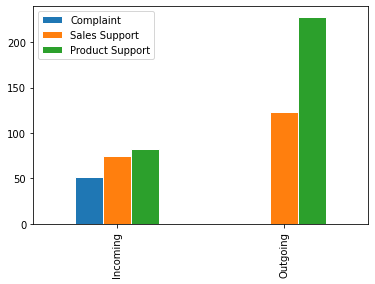

In [26]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = merged_df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

p_df = pd.DataFrame({
    "Complaint": complaints,
    "Sales Support": sales_support,
    "Product Support": product_support
})
p_df.plot.bar(edgecolor = 'white')

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

- for abandonment rates, i choose a pie chart becasue i believe it is the most appropriate to visualize rates, especially in this case where there are less than 6 pies. At a glance, the pie chart shows the comparison within queues and we can see that queue "A" has the highest abandonment rate at 48%. 

For average speed of answer per each rep, I chose a bar chart to show the distribution of answering calls among the different reps, easily showing which rep received calls at the highest speed and in comparison to others, to determine how well the other reps can do and which rep is completely lagging behind.

For each type of call purpose, how many calls are outgoing vs. incoming?
To visualize incoming vs. outgoing, i also chose a bar chart to easily show the distribution of the call purpose. At a glance, we can see that product support is highest for both incoming and outgoing calls. For instance, If there is a need to hire on more people, it is evident that they are mostly needed for the product support team

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? 
In my opinion, the south branch is operating more efficiently because the north center has the highest percentage of abandoned calls. Although, the south branch takes longer minutes to answer the call,however, in comparison to the north branch, the difference is very negligible.

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
I believe the north branch would benefit from more help as they are not doing badly with their services despite having 9 reps as opposed to 11 which the south branch has. I am of the opinion that if they get extra help, they may operate better than the south branch.

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
I wish the dataset for both branches contains the same number of reps and calls, as that is the way a fair judgement could be passed in determining the most efficient branch. 

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
